Given a segmentation mask, modify it (regroup some segemented object together)

In [1]:
# Common import
import numpy as np
import skimage.io as io

import scipy
import scipy.io as sio
from PIL import Image

## Load the data

In [2]:
# Files locations
CONTENT_DIR = "./data/content"
MASK_DIR = "./data/mask"

In [3]:
image = "elephant.jpg"
annotations = "elephant.mat"
save_name = "elephant-sem4"

In [4]:
# Load annotations(.mat)
img = np.array(Image.open(CONTENT_DIR + '/' + image), dtype = np.uint8)
mat_annotations = sio.loadmat(MASK_DIR + '/' + annotations)
mask = mat_annotations["S"]

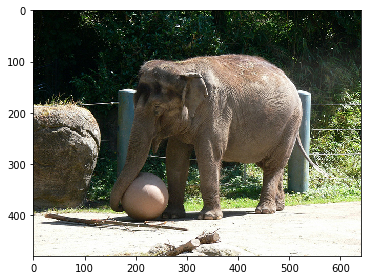

In [5]:
io.imshow(img)
io.show()

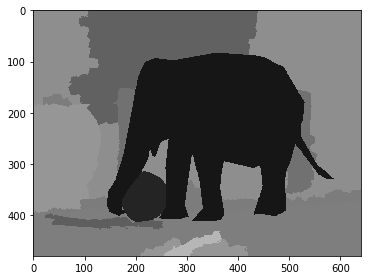

In [6]:
io.imshow(mask)
io.show()

## Mask visualisation

In [7]:
# The unique values are the different semantic regions
np.unique(mask)

array([ 22,  37,  94,  97, 113, 124, 126, 142, 150, 182], dtype=uint8)

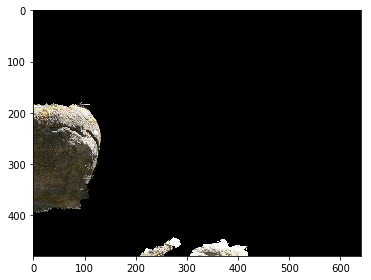

In [8]:
# To know the semantic region of each value
# I' doing it manually...
obj = (mask == 150)
cropped_obj = img * np.dstack((obj,) * 3)
io.imshow(cropped_obj)
io.show()

In [9]:
# After the previous step above for elephant-coco we can observe thatt
# 97 + 113 + 124 + 142 + 150 : vegetation
# 94 + 126 + 182 : earth
# 22 : elephant
# 37 : ball

## Mask modification

In [10]:
# We now regroup the previous semantic regions to obtain a content image with 4 semantic regions:
# 94 : earth
# 97 : vegetation
# 22 : elephant
# 37 : boule

In [11]:
# Vegetation
obj = [97, 113, 124, 142, 150]
value = 150

for idx in obj:
    mask[mask == idx] = value

In [12]:
# Soil
obj = [94, 126, 182]
value = 94

for idx in obj:
    mask[mask == idx] = value

## Check

In [13]:
np.unique(mask)

array([ 22,  37,  94, 150], dtype=uint8)

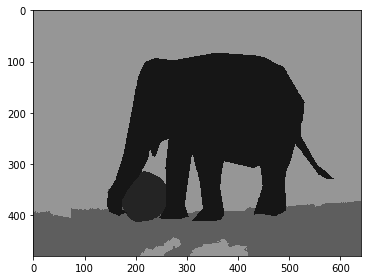

In [14]:
# need to crop the image
# see mask crop
io.imshow(mask)
io.show()

## Save

In [15]:
# Name of the file to save
save_mask = MASK_DIR + '/' + save_name  + ".mat"

In [16]:
# Save mask to .mat
mask_to_save = {}
mask_to_save["S"] = mask
sio.savemat(save_mask, mask_to_save)

## Check my .mat file

In [17]:
mat_file = sio.loadmat(save_mask)
mat_file

{'S': array([[150, 150, 150, ..., 150, 150, 150],
        [150, 150, 150, ..., 150, 150, 150],
        [150, 150, 150, ..., 150, 150, 150],
        ..., 
        [ 94,  94,  94, ...,  94,  94,  94],
        [ 94,  94,  94, ...,  94,  94,  94],
        [ 94,  94,  94, ...,  94,  94,  94]], dtype=uint8),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Sep 25 14:26:26 2018',
 '__version__': '1.0'}